In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib_inline.backend_inline
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits
from pathlib import Path
import numpy as np
import eazy
import pickle
import gc
import os
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 25

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/joint_challenge')
os.chdir(WD)
TEMPDIR = WD.parent / 'BROWN_COSMOS'

from utils import get_result_figures

In [4]:
scheme = "GAMA_COSMOS_7DS_SPHEREx"
base_all = Table.read(WD / "data" / "input" / f"GAMA_COSMOS_input_7DS_WFS_SPHEREx.fits")
base = base_all["ID", "imag", "z_spec", "FLAG_ML"]
outdir = WD / "output" / f"output_{scheme}"

outtab = Table.read(outdir / "output00.fits")

colnames = ['z_phot', 'z_phot_chi2', 'z160', 'z840', 'pit', 'crps', 'id']
for label in colnames:
    base[label] = np.empty(len(base), dtype=float)
    
i = 0

start_id = i*10000
end_id = (i+1)*10000

for label in colnames:
    base[label][start_id:end_id] = outtab[label]

In [5]:
base = base[start_id:end_id]

In [6]:
base

ID,imag,z_spec,FLAG_ML,z_phot,z_phot_chi2,z160,z840,pit,crps,id
,mag,,,,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12,23.990103981421147,0.707,0.0,0.486939400434494,145.06173706054688,0.004006005357950926,0.004006005357950926,0.6561278104782104,0.10908088088035583,12.0
27,24.875468381594267,0.7751,0.0,0.6951285600662231,146.44830322265625,0.004006005357950926,0.004006005357950926,0.45003175735473633,0.08613313734531403,27.0
57,24.701907916699273,0.9672,0.0,1.1974376440048218,149.72540283203125,0.004006005357950926,0.004006005357950926,0.05794919282197952,0.32232820987701416,57.0
73,22.48269003598378,0.429,0.0,0.5650541186332703,117.66346740722656,0.004006005357950926,0.004006005357950926,0.21431681513786316,0.07545405626296997,73.0
74,23.767750415802425,1.5087,1.0,0.8503568768501282,108.0108871459961,0.004006005357950926,0.004006005357950926,0.8313854932785034,0.34614497423171997,74.0
82,24.707701668462914,0.3562,0.0,0.21580345928668976,118.39276885986328,0.004006005357950926,0.004006005357950926,0.08932699263095856,1.2008399963378906,82.0
85,23.76854613020753,1.08,0.0,0.6355363130569458,130.32281494140625,0.004006005357950926,0.004006005357950926,0.697541356086731,0.32300865650177,85.0
104,24.480462347939646,1.2817,0.0,0.6671156287193298,133.0005645751953,0.004006005357950926,0.004006005357950926,0.4688494801521301,0.5254986882209778,104.0


/data1/hbahk/spherex-photoz/spherex-challenge/joint_challenge/utils.py:933: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


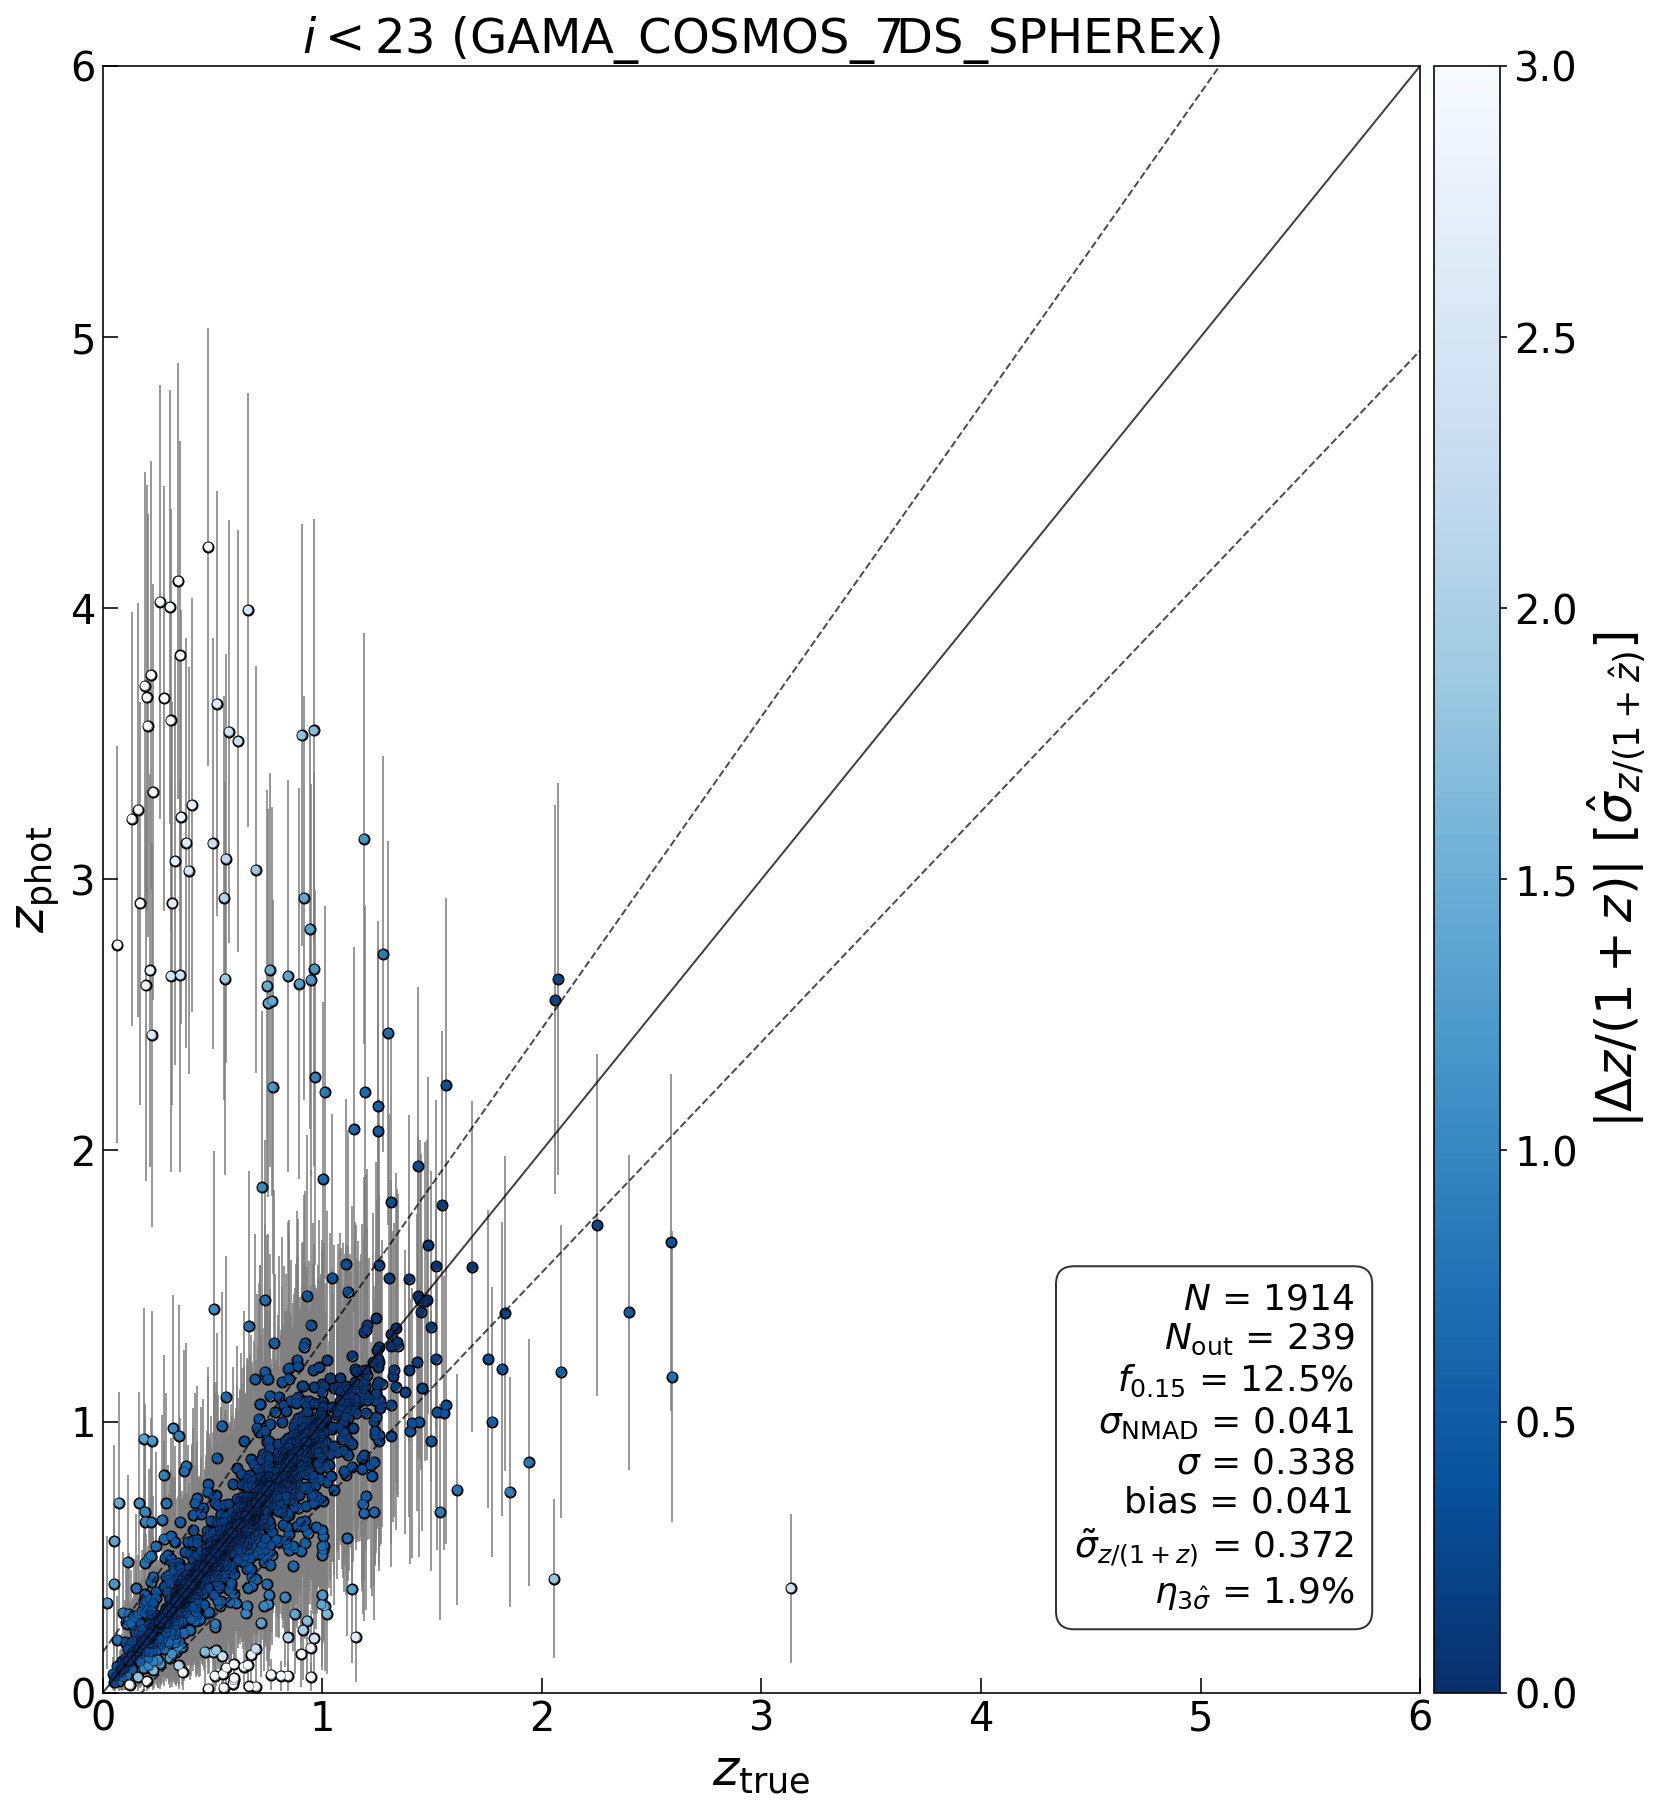

In [7]:
from utils import plot_comp_hexbin
figdir = WD / 'figures'
figdir.mkdir(exist_ok=True)

imask = base['imag'] < 23

id_out = plot_comp_hexbin(base['z_spec'][imask], base['z_phot'][imask],
                        base['z_phot_chi2'][imask],
                        figdir/'test.png', base['id'][imask],
                        z_160=base['z160'][imask], z_840=base['z840'][imask],
                        label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                        title="$i<23$"+f" ({scheme})", xmin=0, xmax=6, cmap='jet',
                        scatter_plot=True, gridsize=(87,50), log_scale=False,
                        residual_plot=False, no_hexbin=True, figsave=False, figclose=False)